In [1]:
%pylab --no-import-all inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [7]:
ls

15CH109.nb                combined/
15CH109.xlsx*             convert-hstate-to-bstate.nb
160615-working-notes.txt  convert-hstate-to-bstate-subject.nb
ALEKS_initial_states/     grades/
backup_grades/            Pandas_practice.ipynb
BU_data/                  topic_based_analysis.nb
BU_data.zip               uncropped_grades/


In [8]:
ls ALEKS_initial_states/

14CH109.xls  15CH109.xls


In [18]:
ls BU_data/

data_format.txt  heavey_list_ok.txt        logcount_MWLHY-FQMRQ.xls
genchema.4.dom   logcount_3TF6L-FTTNE.xls  logcount_NGJAY-W9VMV.xls
genchema.5.dom   logcount_646UF-9QXKA.xls  logcount_NK6KD-VXDT6.xls
genchema.6.dom   logcount_94VNF-YDAMM.xls  logcount_TKUEX-VYWWT.xls
genchema.7.dom   logcount_DMGYQ-TWTG3.xls  logcount_UW3RT-PVHUD.xls
genchemb.4.dom   logcount_GD3YN-NJVLD.xls  logcount_V3FYL-HUXAE.xls
genchemb.5.dom   logcount_GN3NR-94E9A.xls  logcount_VWGDK-AHXAN.xls
genchemb.6.dom   logcount_H9APF-FAQRR.xls  logcount_VWGYE-3GDM3.xls
genchemb.7.dom   logcount_LLQPG-HHCQN.xls  logcount_XXRAU-FK9TU.xls


In [2]:
CH10914 = pd.read_csv('combined/14CH109.csv', names=['state', 'grade'])
CH10914.head()

,state,grade
0,x00000000001fbeaf3ffffd84881e0120010f48780a280...,3.0
1,x00000000001fffff7ffffd85bf8f0324018f62780fb58...,3.0
2,x00000000001ffffffffffd85f80e6f64878fca080fbd1...,2.3
3,x00000000001feeaf3ffffd84d80e2364000f40000f240...,4.0
4,x00000000001ffeef7ffffdc5e84a6b240103c07800200...,4.0


In [165]:
def hex_to_bin_state(state):
    hex_num = state[1:-3]
    domain = state[-1]
    valid_last_digits = int(state[-3])
    if valid_last_digits not in range(1,5):
        raise InputError('Check digit value was {} but should be between 1 and 4'.format(valid_last_digits))
    length = len(hex_num) * 4 - (4 - valid_last_digits)
    if valid_last_digits == 4:
        end_crop = None
    else:
        end_crop = valid_last_digits - 4
    binary_state = (bin(int(hex_num, 16))[2:end_crop]).zfill(length)
    return binary_state
    
ts = hex_to_bin_state(CH10914.iat[0,0])
ts

'000000000000000000000000000000000000000000011111101111101010111100111111111111111111110110000100100010000001111000000001001000000000000100001111010010000111100000001010001010000000000000000000000000110000000000000000000000000000000000000000000000000000000000000001010000000000000000000000101001100000000000000000000000000000000000000000000000000000001000011111110000000000000000011111110011100001000001000010000000000000000000000000000000000000000011100111111101'

In [107]:
def domain_to_list(file_name):
    with open(file_name, 'r') as domain:
        domain_list = []
        for item in domain:
            domain_list.append(item.strip())
    return domain_list

def import_domains(base_name):
    import glob
    domain_files = glob.glob(base_name+'*')
    domains_dict = {}
    for domain in domain_files:
        domains_dict[domain] = domain_to_list(domain)
    return domains_dict

In [108]:
cd BU_data/

/home/theavey/TaR_grades/BU_data


In [109]:
domain_dict = import_domains('genchem')

In [110]:
cd ..

/home/theavey/TaR_grades


In [166]:
def bin_states(dataframe, domain_dict):
    domain_number = dataframe.iat[0,0][-1]
    domain_name = 'genchema.' + domain_number + '.dom'
    domain = domain_dict[domain_name]
    output_array = np.zeros([len(dataframe.index), len(domain)])
    grades = dataframe['grade']
    for row in dataframe.itertuples():
        output_array[row[0]] = list(hex_to_bin_state(row[1]))
    state_frame = pd.DataFrame(output_array.astype(bool), columns=domain)
    return state_frame.join(grades)

In [168]:
ch10914df = bin_states(CH10914, domain_dict)
ch10914df

,acid001,acid002,acid003,acid004,acid005,acid006,acid007,acid008,acid009,acid010,...,unit041,unit043,unit044,unit045,unit047,unit048,unit049,unit051,unit841,grade
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,3.0
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,3.0
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,2.3
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,4.0
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,4.0
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,2.0
6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,3.3
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,False,0.0
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,2.0
9,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,False,False,2.7


In [139]:
ch10914df.dtypes

acid001         bool
acid002         bool
acid003         bool
acid004         bool
acid005         bool
acid006         bool
acid007         bool
acid008         bool
acid009         bool
acid010         bool
acid011         bool
acid012         bool
acid013         bool
acid016         bool
acid018         bool
acid019         bool
acid020         bool
acid021         bool
acid022         bool
acid023         bool
acid024         bool
acid025         bool
acid026         bool
acid027         bool
acid028         bool
acid029         bool
acid030         bool
acid031         bool
acid032         bool
acid035         bool
              ...   
thermo033       bool
thermo034       bool
thermo035       bool
thermo037       bool
thermo038       bool
thermo039       bool
thermo040       bool
thermo041       bool
thermo042       bool
thermo043       bool
thermo044       bool
thermo045       bool
thermo046       bool
thermo047       bool
thermo051       bool
unit014         bool
unit015      

### Try some PCA stuff

In [196]:
from sklearn.decomposition import PCA
import sklearn

In [186]:
pca10914 = PCA(n_components=100)
pca10914.fit(ch10914df.drop('grade', axis=1))

PCA(copy=True, n_components=100, whiten=False)

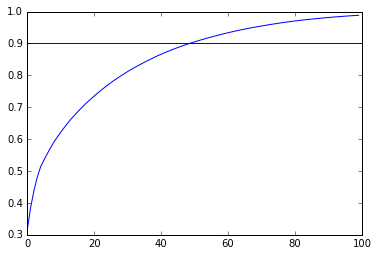

In [191]:
cdf_pca10914 = plt.subplots()
cdf_pca10914[1].plot(np.cumsum(pca10914.explained_variance_ratio_))
cdf_pca10914[1].axhline(y=0.9)

Looks like they intersect at around 50 components: that is, the first 50 principal components explain 90% of the variance in the data. I'll start with that to try to get a fitting.

In [193]:
pca10914_50 = PCA(n_components=50)
ch10914_reduced = pca10914_50.fit_transform(ch10914df.drop('grade', axis=1))

In [195]:
ch10914_reduced.shape

(148, 50)

In [198]:
regr_ch10914 = sklearn.linear_model.LinearRegression()
regr_ch10914.fit(ch10914_reduced, ch10914df['grade'])
regr_ch10914.score(ch10914_reduced, ch10914df['grade'])

0.45880860730298001

'score' give the $R^2$ value for the fit, so this fit is pretty terrible, $R^2=0.46$. I wonder why it's so bad. Would it be better with more or fewer components? Maybe PCA is just not the way to go. It could just be better to exclude columns that are all (or nearly all) homogenous.

In [199]:
pca10914_100 = PCA(n_components=100)
ch10914_reduced_100 = pca10914_100.fit_transform(ch10914df.drop('grade', axis=1))

regr_ch10914_100 = sklearn.linear_model.LinearRegression()
regr_ch10914_100.fit(ch10914_reduced_100, ch10914df['grade'])
regr_ch10914_100.score(ch10914_reduced_100, ch10914df['grade'])

0.71473707174959933

This is obviously better ($R^2 = 0.71$ for 100 components), but I still got a much better fit by picking chunks, and many fewer chunks at that. Seems like PCA is not right for this problem. It seems like some of the features (items, in this case) are just more important and PCA doesn't capture that.

### Save imported and processed data to disk, though shouldn't be hard to import again.

In [172]:
store = pd.HDFStore('store.h5')

In [173]:
store['ch10914'] = ch10914df

In [174]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: store.h5
/ch10914            frame        (shape->[148,463])